In [1]:
from imutils import paths

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import pandas as pd
from datetime import datetime

In [3]:
import cv2 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [4]:
import os 
from skillsnetwork import cvstudio

In [5]:
client = cvstudio.CVStudio()

In [6]:
#client.downloadAll()

In [7]:
annotations = client.get_annotations()

In [8]:
first5 = {k: annotations["annotations"][k] for k in list(annotations['annotations'])[:5]}
first5

{'093d147e-1f13-4d50-93de-4db25192a72a.jpg': [{'label': 'cat',
   'id': 'a4015470-a8a6-4559-952f-55a7b47b67ed'}],
 'eae73e6a-164c-4b6c-b9a9-04120fd49f19.jpg': [{'label': 'dog',
   'id': '4335462e-4f69-4b10-b091-46848c542699'}],
 '310ca4da-80bf-46d4-a1e6-05e6c26ccba2.jpg': [{'label': 'dog',
   'id': '03b1d44b-ce02-45be-9c98-b163e694cd77'}],
 'd12ae555-e8f7-4bf7-8781-1786424dc886.jpg': [{'label': 'dog',
   'id': '20daabb9-d4aa-4251-9dbb-a3631c526c36'}],
 'f860e13d-2f53-4781-8805-d3f3df6d9fb9.jpg': [{'label': 'cat',
   'id': '191169d8-459e-468c-a36f-4d6427fc3778'}]}

In [12]:
filename = 'images/' + random.choice(list(annotations['annotations'].keys()))

In [13]:
filename

'images/775f93bc-8ab0-486c-a3b9-1ce86db7e498.jpg'

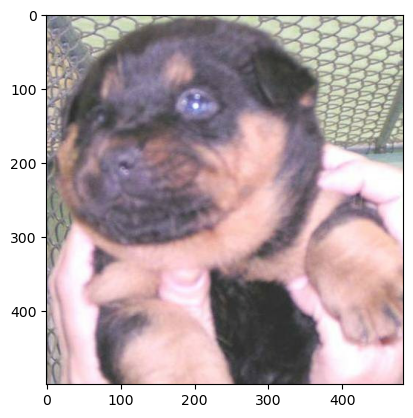

In [14]:
img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
plt.imshow(img)

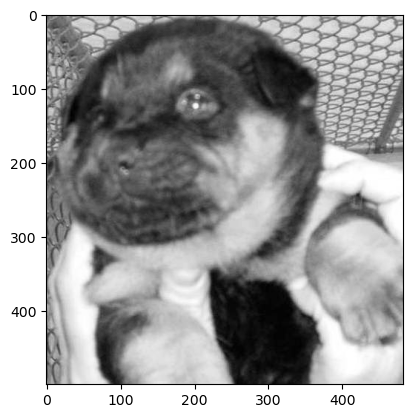

In [15]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap = 'gray')

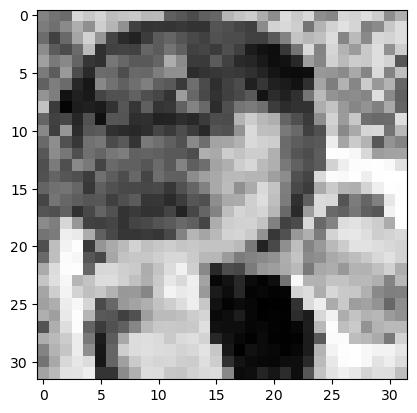

In [16]:
img = cv2.resize(img, (32,32))
plt.imshow(img, cmap = 'gray')

In [17]:
pixels = img.flatten()
print(img, "\n\n\n\n", pixels)

[[155 141 135 ... 214 163 190]
 [149 139 160 ... 160 209 227]
 [136 101 134 ... 222 220 227]
 ...
 [155 194 208 ... 244 244 234]
 [141 184 223 ... 233 240 226]
 [180 199 231 ... 228 227 202]] 



 [155 141 135 ... 228 227 202]


In [18]:
type(pixels)

numpy.ndarray

In [19]:
imgclass = list(annotations['annotations'].values())

In [20]:
imgclass[0]

[{'label': 'cat', 'id': 'a4015470-a8a6-4559-952f-55a7b47b67ed'}]

In [21]:
list(imgclass[0][0].values())[0]

'cat'

In [22]:
imgname = list(annotations['annotations'].keys())

In [23]:
imgname[0]

'093d147e-1f13-4d50-93de-4db25192a72a.jpg'

In [24]:
trainimg = []
trainlabel = []

In [25]:
for i, filename in enumerate(imgname):
    img = cv2.imread("images/" + filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    label = list(imgclass[i][0].values())[0]
    img = cv2.resize(img, (32,32))
    pixels = img.flatten()
    trainimg.append(pixels)
    trainlabel.append(label)
    print("Loading item", str(i+1), "of", str(len(imgname)), "... Image is a", label)

Loading item 1 of 441 ... Image is a cat
Loading item 2 of 441 ... Image is a dog
Loading item 3 of 441 ... Image is a dog
Loading item 4 of 441 ... Image is a dog
Loading item 5 of 441 ... Image is a cat
Loading item 6 of 441 ... Image is a dog
Loading item 7 of 441 ... Image is a cat
Loading item 8 of 441 ... Image is a cat
Loading item 9 of 441 ... Image is a cat
Loading item 10 of 441 ... Image is a cat
Loading item 11 of 441 ... Image is a cat
Loading item 12 of 441 ... Image is a cat
Loading item 13 of 441 ... Image is a cat
Loading item 14 of 441 ... Image is a dog
Loading item 15 of 441 ... Image is a dog
Loading item 16 of 441 ... Image is a cat
Loading item 17 of 441 ... Image is a cat
Loading item 18 of 441 ... Image is a cat
Loading item 19 of 441 ... Image is a dog
Loading item 20 of 441 ... Image is a dog
Loading item 21 of 441 ... Image is a cat
Loading item 22 of 441 ... Image is a dog
Loading item 23 of 441 ... Image is a dog
Loading item 24 of 441 ... Image is a cat
L

In [26]:
trainimg = np.array(trainimg).astype('float32')
trainimg

array([[ 29.,  31.,  32., ...,  77.,  52.,  42.],
       [252., 252., 252., ...,  87.,  85.,  88.],
       [197., 189., 206., ..., 255., 255., 251.],
       ...,
       [ 80.,  82.,  77., ...,  77.,  53.,  45.],
       [ 52.,  56.,  57., ..., 159., 147., 172.],
       [133., 123., 128., ..., 142., 121., 164.]], dtype=float32)

In [27]:
len(trainimg[0])

1024

In [28]:
classes = np.unique(trainlabel)
classes

array(['cat', 'dog'], dtype='<U3')

In [29]:
for i, label in enumerate(classes):
    for j, imgclass in enumerate(trainlabel):
        if imgclass == label:
            trainlabel[j] = i

In [30]:
trainlabel = np.array(trainlabel).astype('int32')

In [31]:
trainlabel.size

441

In [32]:
trainlabel = trainlabel.reshape(trainlabel.size, 1)

In [33]:
trainlabel.shape

(441, 1)

In [34]:
trainlabel.dtype

dtype('int32')

In [35]:
trainimg, testimg, trainlabel, testlabel = train_test_split(trainimg, trainlabel, test_size=0.2, random_state= 0)

In [36]:
print(trainimg.shape, testimg.shape, trainlabel.shape, testlabel.shape)

(352, 1024) (89, 1024) (352, 1) (89, 1)


In [37]:
starttime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(trainimg, cv2.ml.ROW_SAMPLE, trainlabel)

k_val = [1,2,3,4,5]
k_res = [[],[],[],[],[]]

for i, k in enumerate(k_val):
    ret, result, neighbours, dist = knn.findNearest(testimg, k=k)
    for sublist in result:
        for item in sublist:
            k_res[i].append(item)

endtime = datetime.now()
print("Training duration:", str(endtime - starttime))

Training duration: 0:00:00.184371


In [38]:
type(k_res)

list

In [39]:
pred = np.asanyarray(k_res)

In [40]:
pred[0]

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1.], dtype=float32)

In [41]:
testlabel.shape

(89, 1)

In [42]:
accuracy = []
conmtx = []

for res in pred:
    cmx = confusion_matrix(testlabel, res, labels = np.unique(testlabel))
    conmtx.append(cmx)
    correct = 0
    for i, j in zip(res,testlabel):
        if i == j:
            correct += 1
    a = correct * 100 / res.size
    accuracy.append(a)

In [43]:
conmtx, accuracy

([array([[43,  2],
         [ 4, 40]]),
  array([[43,  2],
         [20, 24]]),
  array([[31, 14],
         [19, 25]]),
  array([[35, 10],
         [22, 22]]),
  array([[32, 13],
         [13, 31]])],
 [93.25842696629213,
  75.28089887640449,
  62.92134831460674,
  64.04494382022472,
  70.78651685393258])

In [44]:
resultaccuracy = {k_val[i]: accuracy[i] for i in range(len(k_val))}
finalaccuracy = sorted(resultaccuracy.items())

In [45]:
finalaccuracy

[(1, 93.25842696629213),
 (2, 75.28089887640449),
 (3, 62.92134831460674),
 (4, 64.04494382022472),
 (5, 70.78651685393258)]

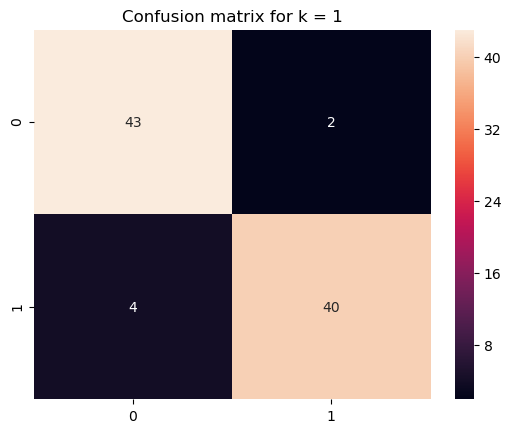

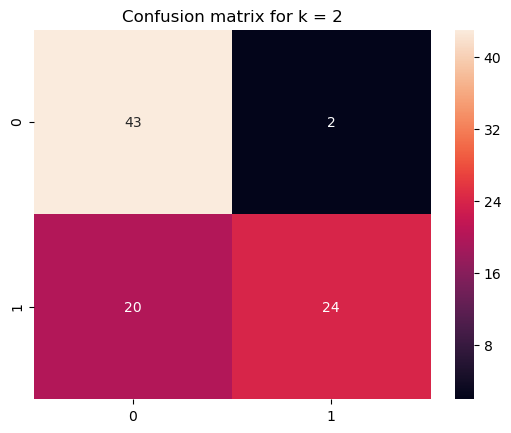

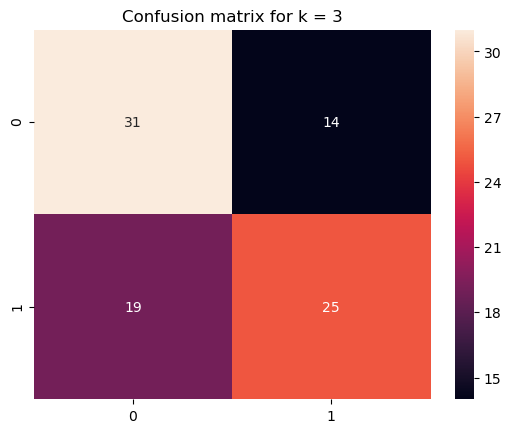

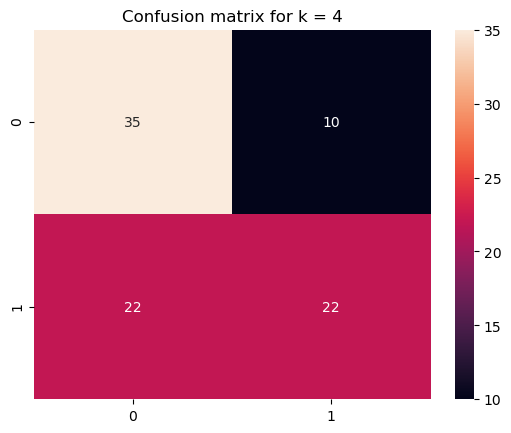

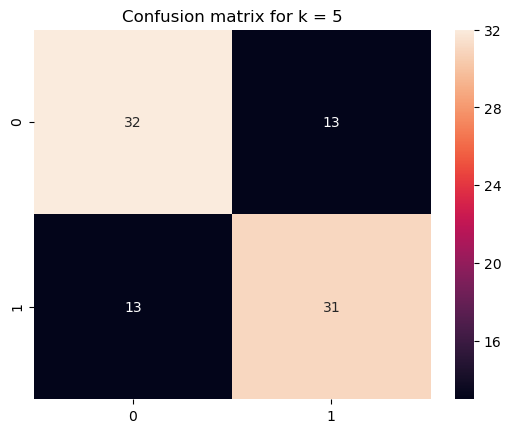

In [46]:
t = 1
for mtx in conmtx:
    df = pd.DataFrame(mtx)
    sns.heatmap(df, annot=True)
    plt.title("Confusion matrix for k = " + str(t))
    plt.show()
    t += 1

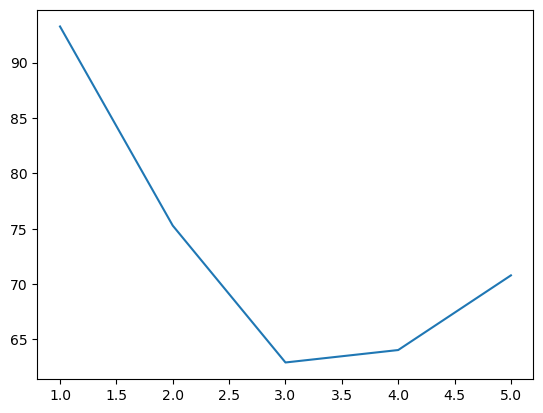

In [47]:
x,y = zip(*finalaccuracy)
plt.plot(x,y)

In [48]:
k_best = max(finalaccuracy,key=lambda item:item[1])
k_best

(1, 93.25842696629213)

In [49]:
parameters = {'k_best': k_best}
result = client.report(started=starttime, completed=endtime, parameters = parameters, accuracy=finalaccuracy)

if result.ok:
    print("Reported back to CV Studio")

Reported back to CV Studio


In [50]:
knn.save('knn_model.yml')

In [51]:
result = client.uploadModel('knn_model.yml', parameters)

File Uploaded
